# 1.) IMPORTING LIBRARIES

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(16,6)

import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 

from collections import Counter

# models

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



# 2.) LOADING DATA

In [5]:
train = pd.read_csv(r"C:\Users\CHAITANYA\Documents\DATA SCIENCE- PROJECTS\HUMAN_ACTIVITY_PREDICTION\dataset\train.csv")
test = pd.read_csv(r"C:\Users\CHAITANYA\Documents\DATA SCIENCE- PROJECTS\HUMAN_ACTIVITY_PREDICTION\dataset\test.csv")

In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
train.shape

(7352, 563)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [9]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [10]:
train.subject.value_counts()

# subjects is one of the column in train dataset

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

# 3.) DATA PREPROCESSING

In [11]:
train.value_counts()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  tBodyAcc-arCoeff()-Y,4  tBodyAcc-arCoeff()-Z,1  tBodyAcc-arCoeff()-Z,2  tBodyAcc-arCoeff()-Z,3  tBodyAcc-arCoeff()-Z,4  tBodyAcc-correlation()-X,Y  tBodyAcc-correlation()-X,Z  tBodyAcc-correlation()-Y,Z  tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-mean()-Z  tGravityAcc-std()-X  tGravityAcc-std()-Y  tGravityAcc-std()-Z  tGravityAcc-mad()-X  tGravi

In [12]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [13]:
#check duplicates
print("duplicates present in train dataset is : " , sum(train.duplicated()))
print("duplicates present in test dataset is  : "  , sum(test.duplicated()))

duplicates present in train dataset is :  0
duplicates present in test dataset is  :  0


In [14]:
#check null values
print("number of null values present in train dataset :  " , train.isna().values.sum())
print("number of null values present in test dataset  :  " ,  test.isnull().values.sum())

number of null values present in train dataset :   0
number of null values present in test dataset  :   0


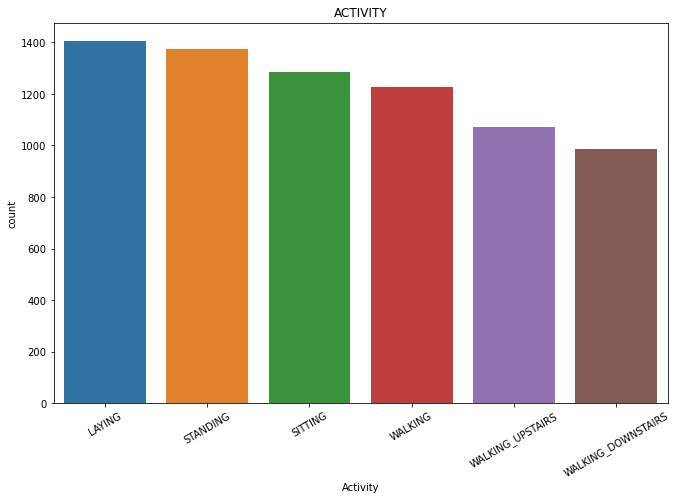

In [15]:
#check balenced data

import warnings 
warnings.filterwarnings("ignore")

import seaborn as sns
plt.figure(figsize=(11,7))
plt.title("ACTIVITY")
sns.countplot(train.Activity , order = train.Activity.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

In [16]:
train.Activity.value_counts()

#no problem in balence data

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

# 4.) EXPLORATORY DATA ANALYSIS

In [17]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [18]:
#splitting by dash(-) of 1st cloumn

"tBodyAcc-mean()-X".split('-')

['tBodyAcc', 'mean()', 'X']

In [19]:
#splitting by "(" 

# [0] indicates only 1st appearence of (

"angle(tBodyAccMean,gravity)".split('(')[0]

'angle'

In [20]:
"angle(tBodyAccMean,gravity)".split('(')

['angle', 'tBodyAccMean,gravity)']

In [21]:
# which one is required reads that only ex:- this doesnot contains "-" so it goes to the next "("

"angle(tBodyAccMean,gravity)".split('-')[0].split('(')[0]

'angle'

In [22]:
[ col for col in train.columns ]  # [ ] is imp if there is not [] it gives error

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [23]:
# here there are so many columns with repetion with X ,Y ,Z 
# to split them we will use our split function 

[ col.split('-')[0].split("(")[0] for col in train.columns ]

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [24]:
# now to know how many unique cols are there and there count use COUNTER function

from collections import Counter

unique=Counter([col.split('-')[0].split("(")[0] for col in train.columns])
unique

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [25]:
colu = [ col.split('-')[0].split("(")[0] for col in train.columns ]
op = pd.Series(colu)
value_counts = op.value_counts()
print(value_counts)

fBodyAcc                79
fBodyGyro               79
fBodyAccJerk            79
tGravityAcc             40
tBodyAcc                40
tBodyGyroJerk           40
tBodyGyro               40
tBodyAccJerk            40
tBodyAccMag             13
tGravityAccMag          13
tBodyAccJerkMag         13
tBodyGyroMag            13
tBodyGyroJerkMag        13
fBodyAccMag             13
fBodyBodyAccJerkMag     13
fBodyBodyGyroMag        13
fBodyBodyGyroJerkMag    13
angle                    7
subject                  1
Activity                 1
dtype: int64


#  4) (i) Analysing tBodyAccMag-mean feature

In [26]:
train['subject'].value_counts().size

21

In [27]:
train["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

<Figure size 504x1224 with 0 Axes>

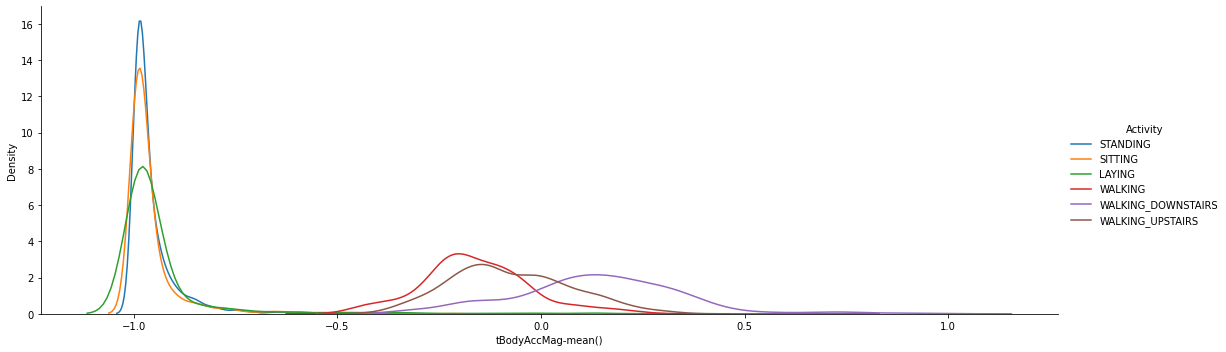

In [28]:
import seaborn as sns

plt.figure(figsize=(7,17))
facetgrid = sns.FacetGrid(train,hue="Activity",height=5,aspect=3)
facetgrid.map(sns.distplot , 'tBodyAccMag-mean()' , hist= False).add_legend()
plt.show()

In [29]:
# static activities => STANDING , SITTING , LAYING
# Dynmic activities => WALKING , WALKING DOWNSTAIRS , WALKING UPSTAIRS 

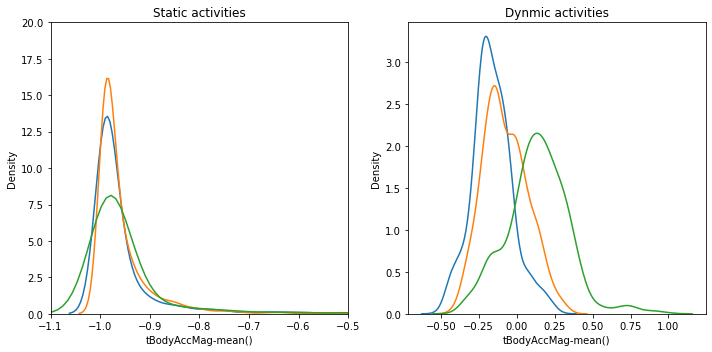

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Static activities')
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist=False)
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist=False)
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist=False)
plt.axis([-1.1,-0.5,0,20])
plt.subplot(1,2,2)
plt.title('Dynmic activities')
sns.distplot(train[train['Activity']=="WALKING"]['tBodyAccMag-mean()'],hist=False)
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist=False)
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist=False)
plt.tight_layout() # Adjust layout => gives sufficient size

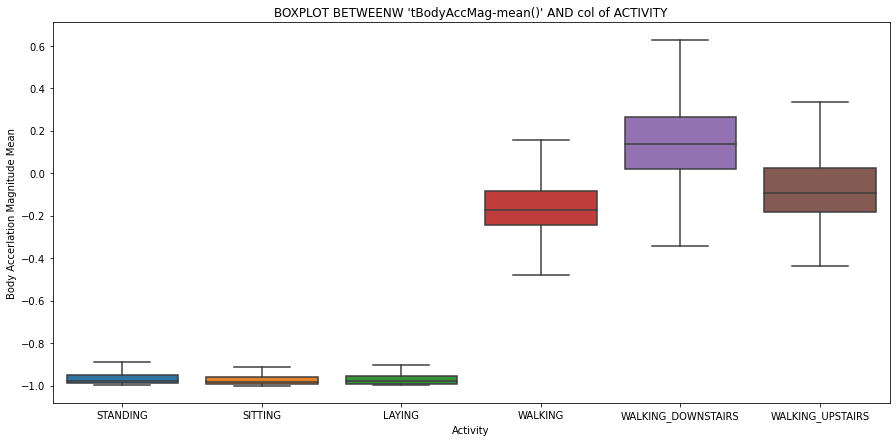

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(data = train , x = 'Activity' , y = 'tBodyAccMag-mean()',showfliers = False)
plt.ylabel('Body Accerlation Magnitude Mean')
plt.title("BOXPLOT BETWEENW 'tBodyAccMag-mean()' AND col of ACTIVITY")
plt.show()

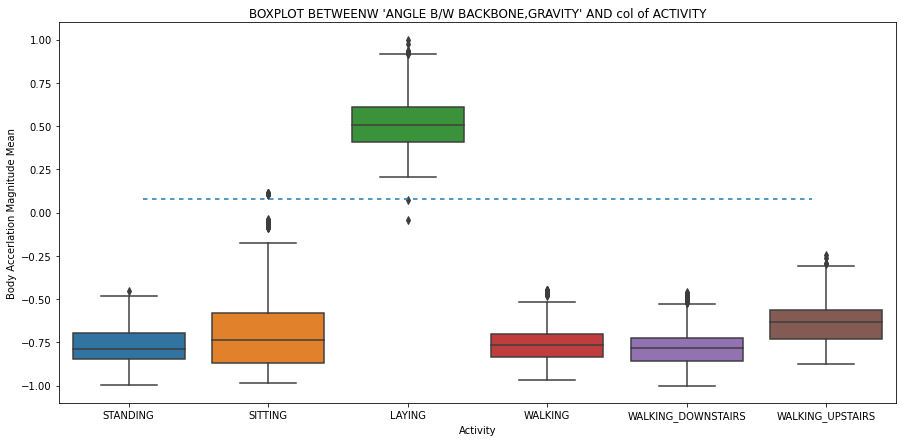

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(data = train , x ='Activity', y = 'angle(X,gravityMean)')
plt.ylabel('Body Accerlation Magnitude Mean')
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,dashes=(3,3))
plt.title("BOXPLOT BETWEENW 'ANGLE B/W BACKBONE,GRAVITY' AND col of ACTIVITY")
plt.show()

In [33]:
# BASICALLY OUR BACKBONE IS ALWAYS PERPENDICULAR TO THE GRAVITY WHEN LAYING
# IN ANY OTHER CASE IT WILL BE NEVER PERPENDICULAR

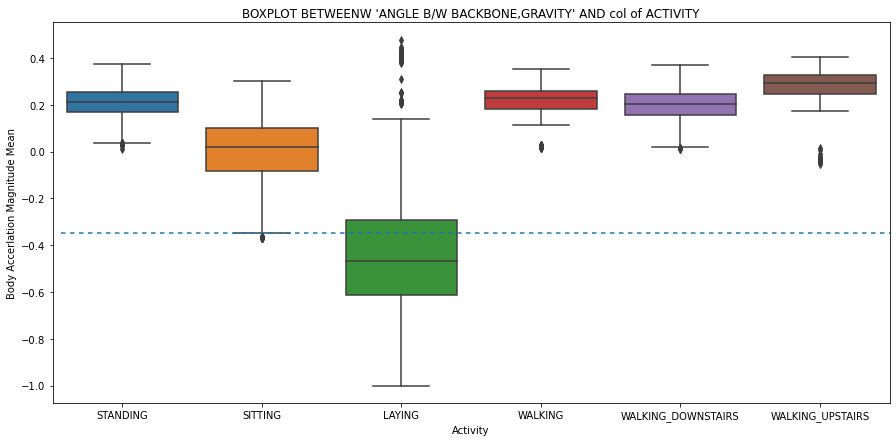

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data = train , x ='Activity', y = 'angle(Y,gravityMean)')
plt.ylabel('Body Accerlation Magnitude Mean')
plt.axhline(y=-0.35,xmin=0.01,dashes=(3,3))
plt.title("BOXPLOT BETWEENW 'ANGLE B/W BACKBONE,GRAVITY' AND col of ACTIVITY")
plt.show()

# 4.) (iv) VISUALIZING DATA USING PCA

In [35]:
from sklearn.decomposition import PCA
x_for_pca = train.drop(['subject' , 'Activity'],axis =1)
pca = PCA(n_components = 2 , random_state = 0).fit_transform(x_for_pca)

In [36]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

In [37]:
# HERE WE DECOMPOSED 500+ FEATURES(531) TO ONLY 2 FEATURES

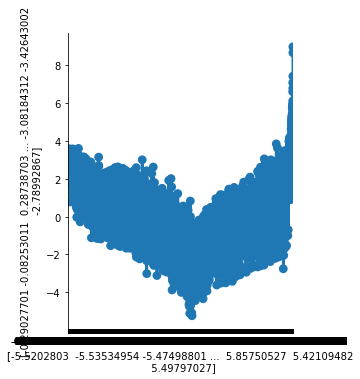

In [38]:
sns.factorplot(x=pca[:,0] , y = pca[:,1],data= train['Activity'])
plt.show()

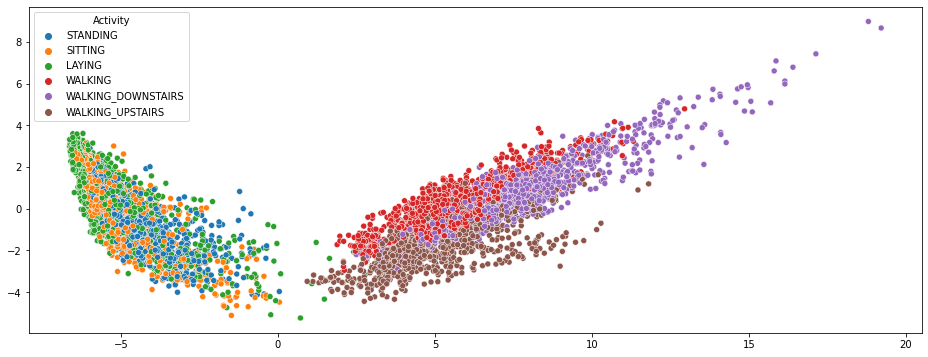

In [39]:
sns.scatterplot(x=pca[:,0] , y = pca[:,1],hue= train['Activity'])
plt.show()

In [40]:
# all the rows except 0th column 
# all the rows except 1st column

In [41]:
# left side orange,green,blue share lot of parameters
# rightside show rest of parameters

# 4.) (v) VISUALIZING DATA WITH TSNE

In [42]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [43]:
from sklearn.manifold import TSNE
x_for_tsne = train.drop(['subject' , 'Activity'],axis =1)
tsne = TSNE(n_components = 2 , random_state = 0).fit_transform(x_for_tsne)
# axis=1 very very important

In [44]:
tsne

array([[ 63.4906   , -39.7206   ],
       [ 13.5708065, -39.372986 ],
       [ 16.88333  , -37.352337 ],
       ...,
       [ 60.73749  ,  14.081628 ],
       [ 60.48153  ,  14.081899 ],
       [ 59.754375 ,  14.62647  ]], dtype=float32)

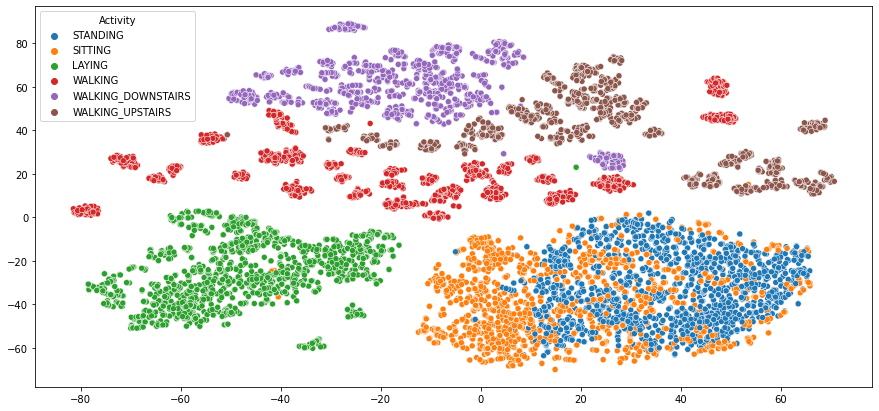

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=tsne[:,0] , y = tsne[:,1],hue= train['Activity'])
plt.show()

In [46]:
# better than pca because it combines all of the data

# 5.) ML MODELS

In [47]:
X_train = train.drop(['subject','Activity'] , axis=1)
y_train = train['Activity']

X_test =test.drop(['subject','Activity'],axis=1)
y_test = test['Activity']

In [48]:
X_train.shape # used for training

(7352, 561)

In [49]:
X_test.shape # used for testing

(999, 561)

# 5.) (i) LOGISTIC REGRESSION including:

### CROSSVALIDATION AND HYPERPARAMETER TUNING

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_iter': [100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rscv= RandomizedSearchCV(lr_classifier,param_distributions=parameters,cv =5,random_state=42)
lr_classifier_rscv.fit(X_train,y_train)
y_pred_lr = lr_classifier_rscv.predict(X_test)

In [51]:
y_pred_lr.shape

(999,)

In [52]:
y_test.shape

(999,)

In [53]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_true=y_test,y_pred=y_pred_lr)
print("accuracy of logistic regression" , lr_accuracy)

accuracy of logistic regression 0.954954954954955


# 5.) SVM MODEL (linear , rbf , poly , sigmoid)

### CROSSVALIDATION AND HYPERPARAMETER TUNING

In [54]:
from sklearn.svm import SVC

parameters ={
    'kernel': ['linear','rbf','poly','sigmoid'] , 
    'C': [100 ,50]
}

svm_rscv = RandomizedSearchCV(SVC(),param_distributions=parameters,cv =5,random_state=42)
svm_rscv.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [55]:
y_pred_svm = svm_rscv.predict(X_test)

In [56]:
svm_accuracy = accuracy_score(y_true=y_test,y_pred=y_pred_svm)

In [57]:
print("accuracy of svm model", svm_accuracy )

accuracy of svm model 0.9679679679679679


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values,y_pred_svm)
plot_confusion_matrix(cm, np.unique(y_pred))

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
get_best_randomsearch_results(svm_rscv)

# 5.) (iii) DESCITION TREE MODEL 

### CROSSVALIDATION AND HYPERPARAMETER TUNING

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
parameters = {
    'maxDepth': np.arange(2, 10,-2)}
Dt_classifier = DecisionTreeClassifier()
Dt_classifier_rscv  = RandomizedSearchCV(Dt_classifier,cv=5,random_state=42,param_distributions=parameters)
Dt_classifier_rscv.fit(X_train,y_train)

# 5.) (IV) RANDOMFOREST MODEL 

### CROSSVALIDATION AND HYPERPARAMETER TUNING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': np.arange(20,101, 10),
    'max_depth': np.arange(2,17,2)
}
model = RandomForestClassifier()
model_rscv = RandomizedSearchCV(model,cv=5,param_distributions=parameters,random_state=42)
model_rscv.fit(X_train,y_train)

In [ ]:
y_pred_rfc = model_rscv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true =y_test, y_pred = y_pred_rfc)

In [ ]:
print("accuracy by randomforest model is :" ,acc)

In [ ]:
def get_best_randomsearch_results(model):
    print(model.best_estimator_)
    print(model.best_params_)

In [ ]:
get_best_randomsearch_results(model_rscv)